In [1]:
## 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## 딥러닝 모듈
import tensorflow
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from keras.utils import to_categorical
from keras.losses import MSE
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [5]:
from glob import glob
import cv2 as cv

## 01. Dogs vs Cats

In [9]:
file_list = glob("../8day/data/train/*.jpg")

In [16]:
file_list[0]

'../8day/data/train\\cat.0.jpg'

In [20]:
j = 0
for i in file_list:
    if "dog" in i:
        break
    j += 1
print(j)

12500


In [26]:
X = np.zeros((1000,150,150,3))

for idx, file in enumerate(file_list[:500]):
    x = plt.imread(file)
    x = cv.resize(x,(150,150))
    X[idx] = x
y_cat = np.repeat(0,500)

for idx, file in enumerate(file_list[12500:13000]):
    idx1 = idx + 500
    x = plt.imread(file)
    x = cv.resize(x,(150,150))
    X[idx1] = x
y_dog = np.repeat(1,500)

In [23]:
y = np.concatenate([y_cat, y_dog])

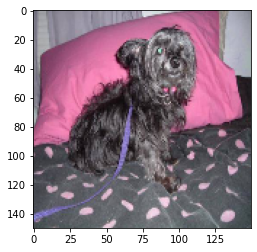

In [29]:
plt.imshow(X[500].astype("int"))

In [31]:
from keras import models
from keras import layers
from keras import optimizers

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [39]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_test,y_test)
)

Epoch 1/20
24/24 [==============================] - 18s 718ms/step - loss: 6.2965 - acc: 0.4787 - val_loss: 2.6644 - val_acc: 0.4760
Epoch 2/20
24/24 [==============================] - 18s 728ms/step - loss: 1.0748 - acc: 0.5547 - val_loss: 0.7503 - val_acc: 0.5240
Epoch 3/20
24/24 [==============================] - 18s 744ms/step - loss: 0.7658 - acc: 0.6067 - val_loss: 0.8357 - val_acc: 0.4760
Epoch 4/20
24/24 [==============================] - 18s 769ms/step - loss: 0.6672 - acc: 0.6427 - val_loss: 0.7569 - val_acc: 0.5200
Epoch 5/20
24/24 [==============================] - 19s 775ms/step - loss: 0.6370 - acc: 0.6720 - val_loss: 0.9603 - val_acc: 0.5040
Epoch 6/20
24/24 [==============================] - 18s 740ms/step - loss: 0.5862 - acc: 0.6947 - val_loss: 0.7861 - val_acc: 0.5760
Epoch 7/20
24/24 [==============================] - 18s 740ms/step - loss: 0.5095 - acc: 0.7333 - val_loss: 0.7469 - val_acc: 0.6000
Epoch 8/20
24/24 [==============================] - 18s 730ms/step - 

In [40]:
from keras.applications import VGG16, VGG19

In [46]:
base_model = VGG16(include_top=False, input_shape=(150, 150, 3))

In [53]:
# base_model.layers[1].get_weights()[0]
# base_model.summary() => 마지막값 (None, 4, 4, 512)

In [54]:
model = Sequential(
    [
        Flatten(),
        Dense(512,activation="relu"),
        Dense(1,activation="sigmoid")
    ]
)

In [56]:
# base_model.predict(X_train).shape (750, 4, 4, 512)
X_train_conv = base_model.predict(X_train)

24/24 [==============================] - 68s 3s/step


In [57]:
X_test_conv = base_model.predict(X_test)

8/8 [==============================] - 24s 3s/step


In [60]:
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [61]:
model.fit(X_train_conv,
            y_train,
            epochs=20,
            validation_data=(X_test_conv, y_test))

Epoch 1/20
24/24 [==============================] - 2s 51ms/step - loss: 17.6336 - accuracy: 0.8480 - val_loss: 1.2876 - val_accuracy: 0.9200
Epoch 2/20
24/24 [==============================] - 1s 44ms/step - loss: 1.4457 - accuracy: 0.9480 - val_loss: 2.7639 - val_accuracy: 0.8960
Epoch 3/20
24/24 [==============================] - 1s 47ms/step - loss: 0.2957 - accuracy: 0.9827 - val_loss: 2.4153 - val_accuracy: 0.9080
Epoch 4/20
24/24 [==============================] - 1s 46ms/step - loss: 0.1032 - accuracy: 0.9907 - val_loss: 2.6530 - val_accuracy: 0.9120
Epoch 5/20
24/24 [==============================] - 1s 46ms/step - loss: 0.6214 - accuracy: 0.9800 - val_loss: 2.3851 - val_accuracy: 0.9280
Epoch 6/20
24/24 [==============================] - 1s 46ms/step - loss: 0.4542 - accuracy: 0.9880 - val_loss: 4.9858 - val_accuracy: 0.8880
Epoch 7/20
24/24 [==============================] - 1s 46ms/step - loss: 0.1897 - accuracy: 0.9933 - val_loss: 2.3059 - val_accuracy: 0.9320
Epoch 8/20
2

In [82]:
### 모델 예측 프로그램
def predict(x):
    x = plt.imread(x)
    if x.shape[2] > 3:
        x = x[:,:,:3]
    x = cv.resize(x, (150,150))
    plt.imshow(x)
    x = base_model.predict(x.reshape(-1,150,150,3))
    result = np.where(model.predict(x) > 0.5, "강아지", "고양이")
    
    return result

1/1 [==============================] - 0s 29ms/step


array([['고양이']], dtype='<U3')

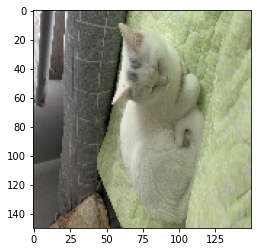

In [83]:
predict("./data/01.jpg")

1/1 [==============================] - 0s 18ms/step


array([['고양이']], dtype='<U3')

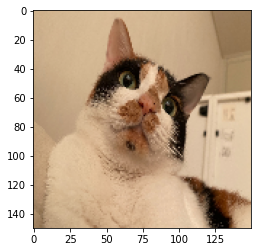

In [84]:
predict("./data/02.jpg")

1/1 [==============================] - 0s 20ms/step


array([['강아지']], dtype='<U3')

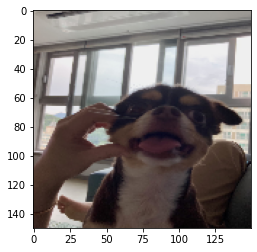

In [85]:
predict("./data/03.jpg")

1/1 [==============================] - 0s 23ms/step


array([['강아지']], dtype='<U3')

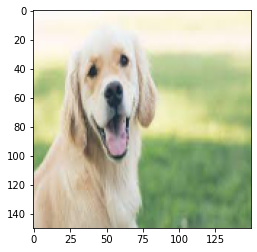

In [86]:
predict("./data/04.jfif")

In [87]:
x = plt.imread("./data/05.PNG")
x.shape

(231, 218, 4)

1/1 [==============================] - 0s 19ms/step


array([['고양이']], dtype='<U3')

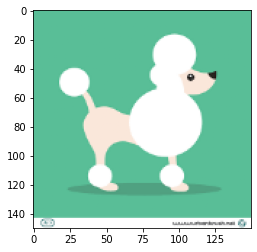

In [88]:
predict("./data/05.PNG")

## 02.cifar10

### VGG19

In [91]:
from keras.datasets import cifar10

In [93]:
from keras.applications import VGG16, VGG19

In [127]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [130]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [128]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [132]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

In [96]:
# ??VGG16
# ??VGG19

In [133]:
base1_model = VGG19(include_top=False,
                    input_shape=(32,32,3))

In [134]:
model = Sequential(
    [
        Flatten(),
        Dense(512,activation="relu"),
        Dense(10,activation="softmax")
    ]
)

In [108]:
# base1_model.summary()
# base_model.summary()

In [104]:
# dir(keras.applications)

In [135]:
X_train_conv = base1_model.predict(X_train)
X_test_conv = base1_model.predict(X_test)

313/313 [==============================] - 66s 211ms/step


In [136]:
model.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [137]:
model.fit(X_train_conv,
            y_train,
            epochs=20,
            batch_size=512,
            validation_data=(X_test_conv, y_test))

Epoch 1/20
98/98 [==============================] - 2s 11ms/step - loss: 5.6141 - accuracy: 0.4279 - val_loss: 2.5188 - val_accuracy: 0.4852
Epoch 2/20
98/98 [==============================] - 1s 10ms/step - loss: 1.7886 - accuracy: 0.5287 - val_loss: 1.5643 - val_accuracy: 0.5272
Epoch 3/20
98/98 [==============================] - 1s 10ms/step - loss: 1.1848 - accuracy: 0.6120 - val_loss: 1.4268 - val_accuracy: 0.5711
Epoch 4/20
98/98 [==============================] - 1s 11ms/step - loss: 0.9537 - accuracy: 0.6741 - val_loss: 1.4593 - val_accuracy: 0.5725
Epoch 5/20
98/98 [==============================] - 1s 10ms/step - loss: 0.8133 - accuracy: 0.7181 - val_loss: 1.3994 - val_accuracy: 0.5927
Epoch 6/20
98/98 [==============================] - 1s 13ms/step - loss: 0.7016 - accuracy: 0.7573 - val_loss: 1.5392 - val_accuracy: 0.5795
Epoch 7/20
98/98 [==============================] - 1s 13ms/step - loss: 0.6172 - accuracy: 0.7861 - val_loss: 1.5581 - val_accuracy: 0.5853
Epoch 8/20
98

In [142]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________
